# EDA & Feature Engineering 실습

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# 에러가 있는 어떠한 행을 불러오지 않는 인자 'error_bad_lines=False' 사용
data = pd.read_csv('passwords.txt', header=None, error_bad_lines=False)

b'Skipping line 6408: expected 1 fields, saw 6\nSkipping line 34362: expected 1 fields, saw 6\nSkipping line 54809: expected 1 fields, saw 6\nSkipping line 68015: expected 1 fields, saw 6\nSkipping line 195470: expected 1 fields, saw 6\nSkipping line 206508: expected 1 fields, saw 6\nSkipping line 239978: expected 1 fields, saw 6\nSkipping line 258251: expected 1 fields, saw 6\nSkipping line 260010: expected 1 fields, saw 6\nSkipping line 260347: expected 1 fields, saw 6\nSkipping line 284675: expected 1 fields, saw 6\nSkipping line 303212: expected 1 fields, saw 6\nSkipping line 354210: expected 1 fields, saw 6\nSkipping line 372222: expected 1 fields, saw 6\nSkipping line 380179: expected 1 fields, saw 6\nSkipping line 425527: expected 1 fields, saw 6\nSkipping line 430725: expected 1 fields, saw 6\nSkipping line 444114: expected 1 fields, saw 6\nSkipping line 460592: expected 1 fields, saw 6\nSkipping line 462665: expected 1 fields, saw 6\nSkipping line 480616: expected 1 fields, sa

In [0]:
data.head()

,0
0,7606374520
1,piontekendre
2,rambo144
3,primoz123
4,sal1387


In [0]:
data.shape

(1048489, 1)

In [0]:
# null 값 삭제
data.dropna(inplace=True)
data.shape

(1048485, 1)

In [0]:
# column 명을 'text'로 변경
data.columns = ['text']
data.head()

,text
0,7606374520
1,piontekendre
2,rambo144
3,primoz123
4,sal1387


In [0]:
# text 변수에 text열을 Series로 저장
text = data['text']
print (type(text))

<class 'pandas.core.series.Series'>


In [0]:
# value_counts()로 10행까지 보기
text.value_counts()[:10]

0            21
123          12
1            10
8             8
123456        8
1230          7
5             7
123456789     7
2             7
pl            6
Name: text, dtype: int64

In [0]:
# password 문자열의 길이를 'length' 열을 생성
data['length'] = data['text'].apply(len)
data.head()

,text,length
0,7606374520,10
1,piontekendre,12
2,rambo144,8
3,primoz123,9
4,sal1387,7


In [0]:
# 길이가 5이상인 password의 value_sounts()
data[data.length > 4]["text"].value_counts()[:10]

123456       8
123456789    7
12345        6
11111        5
7758521      5
5201314      5
43162        5
102030       4
28185        4
43218        4
Name: text, dtype: int64

In [0]:
# 영대문자수를 추출하기 방법1.

def caps(my_string):
    return sum([1 for _ in my_string if _.isupper()])

print (caps("all lower case"))
print (caps("soMe lower caSe"))

# apply 함수로 추출
data['text'].apply(caps).head()

0
2


0    0
1    0
2    0
3    0
4    0
Name: text, dtype: int64

In [0]:
# 'num_caps' 열을 생성
data['num_caps'] = data['text'].apply(caps)
data.head(10)

,text,length,num_caps
0,7606374520,10,0
1,piontekendre,12,0
2,rambo144,8,0
3,primoz123,9,0
4,sal1387,7,0
5,EVASLRDG,8,8
6,Detroit84,9,1
7,dlbd090505,10,0
8,snoesje12,9,0
9,56412197,8,0


In [0]:
# 방법2. apply lambda 함수 사용
data['lambda_num_caps'] = data['text'].apply(lambda x: sum([1 for _ in x if _.isupper()]))
data.head(10)

,text,length,num_caps,lambda_num_caps
0,7606374520,10,0,0
1,piontekendre,12,0,0
2,rambo144,8,0,0
3,primoz123,9,0,0
4,sal1387,7,0,0
5,EVASLRDG,8,8,8
6,Detroit84,9,1,1
7,dlbd090505,10,0,0
8,snoesje12,9,0,0
9,56412197,8,0,0


In [0]:
# drop 'lambda_num_caps' 열삭제, axis=1은 열, inplace=True 인자는 원본변수에서 완전 삭제
data.drop('lambda_num_caps', axis=1, inplace=True)
data.head()

,text,length,num_caps
0,7606374520,10,0
1,piontekendre,12,0
2,rambo144,8,0
3,primoz123,9,0
4,sal1387,7,0


In [0]:
data.describe()

,length,num_caps
count,1.048485e+06,1.048485e+06
mean,8.390173e+00,2.575392e-01
std,2.269470e+01,1.205588e+00
min,1.000000e+00,0.000000e+00
25%,7.000000e+00,0.000000e+00
50%,8.000000e+00,0.000000e+00
75%,9.000000e+00,0.000000e+00
max,8.192000e+03,2.690000e+02


# Indexing & Slicing

In [0]:
# length가 1인 value값만 데이터프레임 반환 <- Boolean 인덱싱 
data[data['length'] == 1].head()

,text,length,num_caps
11879,8,1,0
15346,7,1,0
16983,*,1,0
43379,8,1,0
64848,.,1,0


In [0]:
# 대문자가 1이상 포함된 값만 데이터프레임 반환
data[data['num_caps'] > 0].head()

,text,length,num_caps
5,EVASLRDG,8,8
6,Detroit84,9,1
36,NaJT5UCH,8,6
93,UlMtTX,6,4
104,SL123456sl,10,2


In [0]:
data[data.num_caps > 0].shape

(100185, 3)

In [0]:
# length가 100인 이상인 값만 데이터프레임 반환
data[data.length > 100]

,text,length,num_caps
38830,><script>alert(1)</script>\r123Lenda#\rhallibu...,8192,242
387398,\r251885394\rmello2\rmaitre1123\rfk6Ehruu\rthi...,8192,176
451793,39<0Y~c.;A1Bj\r3ddd4t\r516ks516\rag0931266\rac...,8192,223
517600,12345\rhdjcb100\r060571\rkaalimaa\rrelaxmax\rd...,8192,184
580134,or1=1--\r13817676085\r594112\rmactools\r880148...,8192,216
752693,pass\rmbmb266888\r1988luolin\r15877487956\rcri...,8192,180
841857,==)!)(=\raviral\rrimmir33\rhutcheson\rrr801201...,8192,269
1013991,AAj6H\rweebeth\rmonitor222\rem1981\ralexs123\r...,8192,269


In [0]:
# length가 100 이상인 값의 index 보기
data[data.length > 100].index

Int64Index([38830, 387398, 451793, 517600, 580134, 752693, 841857, 1013991], dtype='int64')

In [0]:
print (data[data.length > 100].shape)  

# drop으로 100 이상인 행을 삭제 axis=0 인자는 행을 지정
data.drop(data[data.length > 100].index, axis=0, inplace=True)

# 1,048,485 - 8 == 1,048,477
print (data.shape)

(8, 3)
(1048477, 3)


# EDA

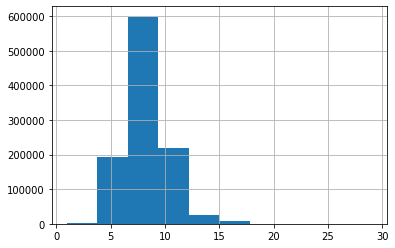

In [0]:
# 'length' 히스토그램
data['length'].hist()

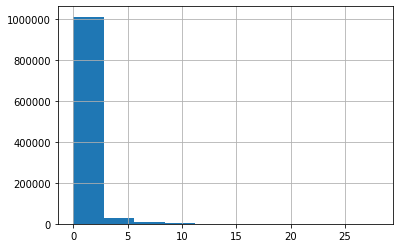

In [0]:
# 'num_caps' 히스토그램
data['num_caps'].hist() 

In [0]:
# sort_values 메서드로 lengh 열 오름차순 ascending=0
data.sort_values('length')

,text,length,num_caps
213231,#,1,0
740845,m,1,0
878195,0,1,0
919079,0,1,0
206917,6,1,0
64848,.,1,0
826917,\,1,0
378378,0,1,0
72260,%,1,0
831067,5,1,0


In [0]:
# ascending=False는 내림차순
data.sort_values('length', ascending=False)

,text,length,num_caps
250716,IhanVitunPitkaSalasanaSaakeli,29,5
765290,dj-explosion_isan@hotmail.com,29,0
608918,http://ro.netlog.com/ioanamya,29,0
217054,835B2D5E447C64B9A5782DD76353A,29,9
851463,0bTW3MNmJ0AWCOkaYmiA7DIVGt8DX,29,17
863011,111-222-1933email@address.com,29,0
1015795,f48a4948c8ea5a546f48...912c34,29,0
661093,EAANt8NPs4oz7rDY_bz3pQHLg--~A,29,12
8660,sirmicandrijana96@hotmail.com,29,0
697507,hessam is a wanker hanzo says,29,0


In [0]:
# 'length'와 'num_caps' 변수로 내림차순하기
data.sort_values(['length', 'num_caps'], ascending=False).head()

,text,length,num_caps
851463,0bTW3MNmJ0AWCOkaYmiA7DIVGt8DX,29,17
661093,EAANt8NPs4oz7rDY_bz3pQHLg--~A,29,12
217054,835B2D5E447C64B9A5782DD76353A,29,9
250716,IhanVitunPitkaSalasanaSaakeli,29,5
8660,sirmicandrijana96@hotmail.com,29,0


In [0]:
# 두변수에 각각 ascending option 반영도 가능
data.sort_values(['length', 'num_caps'], ascending=[False, True]).head()

,text,length,num_caps
8660,sirmicandrijana96@hotmail.com,29,0
116820,waaaaaaaaaaaaaaaaaaaaaaaaaaaa,29,0
173755,mighty morphing power rangers,29,0
287465,namfon_love_i.p.v@hotmail.com,29,0
608918,http://ro.netlog.com/ioanamya,29,0


In [0]:
# password에 "pass", "guest", "123"이 포함되어 있으면 True, 이외는 False를 생성
common = ['pass', 'guest', '123', '789', 'admin']

def has_common_phrase(my_string):
    return any([_ in my_string for _ in common])

print (has_common_phrase("admin123"))
print (has_common_phrase("sfklvjhdnlhsef234235234"))
print (has_common_phrase("guest23"))
print (has_common_phrase("gues23"))    

True
False
True
False


In [0]:
# apply 메서드를 사용하여 'has_common_phrase' 열 생성
data['has_common_phrase'] = data['text'].apply(has_common_phrase)
data.head()

,text,length,num_caps,has_common_phrase
0,7606374520,10,0,False
1,piontekendre,12,0,False
2,rambo144,8,0,False
3,primoz123,9,0,True
4,sal1387,7,0,False


In [0]:
# value_counts로 True, False values 확인
data['has_common_phrase'].value_counts()

False    1003782
True       44695
Name: has_common_phrase, dtype: int64

In [0]:
# normalize=True 인자로 % 비율 확인
data['has_common_phrase'].value_counts(normalize=True)

False    0.957372
True     0.042628
Name: has_common_phrase, dtype: float64

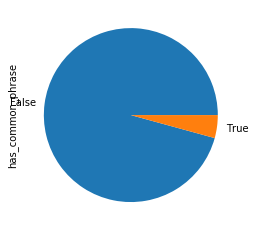

In [0]:
# pie chart 그리기
data['has_common_phrase'].value_counts().plot.pie()

In [0]:
# 대문자수에서 총길이를 나눠 'percent_caps' 열 생성
data['percent_caps'] = data['num_caps'] / data['length']
data.head()

,text,length,num_caps,has_common_phrase,percent_caps
0,7606374520,10,0,False,0.0
1,piontekendre,12,0,False,0.0
2,rambo144,8,0,False,0.0
3,primoz123,9,0,True,0.0
4,sal1387,7,0,False,0.0


In [0]:
# 대문자열의 비율이 80% 이상인 values의 데이터프레임 반환
data[data['percent_caps'] > .8].head()

,text,length,num_caps,has_common_phrase,percent_caps
5,EVASLRDG,8,8,False,1.000000
151,ANKEN,5,5,False,1.000000
223,_CECILE,7,6,False,0.857143
259,PITBIKE,7,7,False,1.000000
285,ALLOHUAKBAR!,12,11,False,0.916667


In [0]:
# password에 포함된 특수기호 갯수를 'special_characters' 열에 생성  

special = "!@#$%^&*()+=_-"

def count_special_characters(my_string):
    return sum([1 for _ in my_string if _ in special])

data['special_characters'] = data['text'].apply(count_special_characters)
data.head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
0,7606374520,10,0,False,0.0,0
1,piontekendre,12,0,False,0.0,0
2,rambo144,8,0,False,0.0,0
3,primoz123,9,0,True,0.0,0
4,sal1387,7,0,False,0.0,0


In [0]:
# 3개 이상의 특수기호를 포함한 values를 데이터프레임으로 반환
data[data['special_characters'] > 2].head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
1372,@stewart@@,10,0,False,0.0,3
1812,hongnam@@@,10,0,False,0.0,3
2194,effie___,8,0,False,0.0,3
3794,po&po444==,10,0,False,0.0,3
3796,zhan!@#$%^,10,0,False,0.0,6


In [0]:
# notsogreat 변수에 여러 조건을 포함한 값을  저장하여 반환 
notsogreat = data[(data['length'] <= 8) &  # length of password is 8 characters or less
                  (data['has_common_phrase'] == True) &  # has some common phrase
                  (data['special_characters'] == 0) &  # has no special characters
                  (data['percent_caps'] == 0)]  # percentage of uppercase characters is 0%

notsogreat.head()

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
53,xutao123,8,0,True,0.0,0
61,amg123,6,0,True,0.0,0
108,12345614,8,0,True,0.0,0
117,passme,6,0,True,0.0,0
188,ae12345,7,0,True,0.0,0


In [0]:
notsogreat.shape

(15252, 6)

In [0]:
# betterpassowords 변수에 이상적인 조건의 passoword의 값을 저장하여 반환
betterpasswords = data[(data['length'] > 16) &  # length of password if 17 characters or more
                       (data['has_common_phrase'] == False) &  # has no common phrase
                       (data['special_characters'] > 2) &  # has 3 or more special characters
                       (data['percent_caps'] > .1)] # percentage of uppercase characters is higher than 10%

betterpasswords.shape

(15, 6)

In [0]:
betterpasswords

,text,length,num_caps,has_common_phrase,percent_caps,special_characters
46929,$1$A$OsW5TjmIcgkbKylJ6NkWP,26,10,False,0.384615,3
143866,IBM!_DEC@_SUN#_HP$,18,11,False,0.611111,7
246681,!Q!W@E#R$T%Y^U&I*,17,8,False,0.470588,9
273464,Sainte-Marie-La-Blanche,23,4,False,0.173913,3
288413,Happy Birthday!!!,17,2,False,0.117647,3
449021,LP+vi8jtiQZBFVJCXkyLRA==,24,13,False,0.541667,3
457244,_x8ROa2b5-swlg92a!,18,2,False,0.111111,3
473011,oO_KnightSpirit_Oo@yahoo.com,28,4,False,0.142857,3
516938,a%3A2%3A%7Bs%3A5%3A%22,22,5,False,0.227273,6
614704,$1$$i63gBKzKSznjzUiEWRZh0.,26,9,False,0.346154,3


In [0]:
# 노출이 쉬운 worst passoword를 탐색
worst_passwords_2018 = [
"123456",
"password",
"123456789",
"12345678",
"12345",
"111111",
"1234567",
"sunshine",
"qwerty",
"iloveyou"
]
worst_passwords_2018

['123456',
 'password',
 '123456789',
 '12345678',
 '12345',
 '111111',
 '1234567',
 'sunshine',
 'qwerty',
 'iloveyou']

In [0]:
text[text.isin(worst_passwords_2018)].shape

(34,)